In [54]:
import heartpy as hp
import numpy as np
import pandas as pd

sample_rate = 240.0

# No filtering

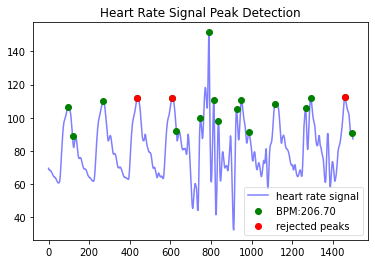

In [55]:
data = hp.get_data('Data/Raw Data/Multiple Cath/X001.txt', delim = ' ', column_name = 'AO')
data = data[0:1500]
working_data, measures = hp.process(data, 240.0)
hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')

# Filtering as described in paper

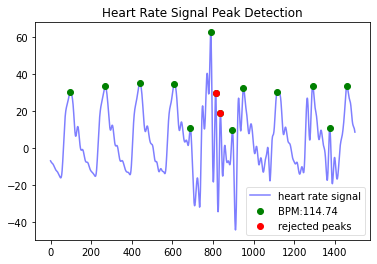

In [56]:
data1 = hp.get_data('Data/Raw Data/Multiple Cath/X001.txt', delim = ' ', column_name = 'AO')
data1 = data1[0:1500]

filtered_a = hp.filter_signal(data1, cutoff=15, sample_rate=240.0, order=4, filtertype='lowpass')
filtered_b = hp.filter_signal(filtered_a, cutoff=.01, sample_rate=240.0, order=4, filtertype='highpass')
working_data, measures = hp.process(filtered_b, 240.0)
plot = hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')


# Generalizing

In [57]:
# The except blocks are placeholders, I want to see the errors right now and I am going to handle them later.
def preprocess(data, sample_rate=240.0):
    # Change values ouside possible range to min and max pulse value
    data = [0 if i <= 0 else (550 if i > 550 else i) for i in data]
    tag = ""
    try:
        data = hp.filter_signal(data, cutoff=15, sample_rate=sample_rate, order=4, filtertype='lowpass')
        tag += "Low"
    except ZeroDivisionError as e:
        print("Can't Divide by Zero -", e)
    try:
        data = hp.filter_signal(data, cutoff=.01, sample_rate=sample_rate, order=4, filtertype='highpass')
        tag += "High"
    except ZeroDivisionError as e:
        print("Can't Divide by Zero -", e)
    try:
        working_data, measures = hp.process(hrdata=data, sample_rate=sample_rate, report_time=True, bpmmin=0, bpmmax=550)
        plot = hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')
    except:
        return
    return working_data, measures, plot, tag

X001.txt

Finished in 0.019490 sec


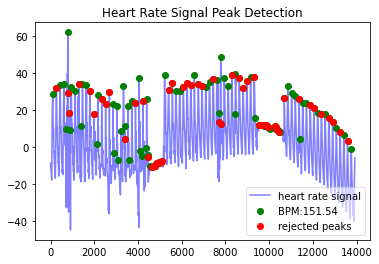

LowHigh
X002.txt

Finished in 0.035956 sec


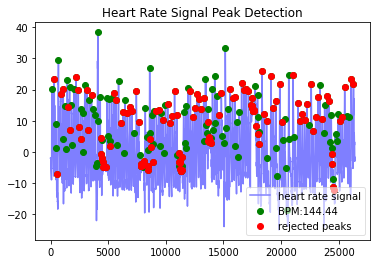

LowHigh
X003.txt

Finished in 0.049579 sec


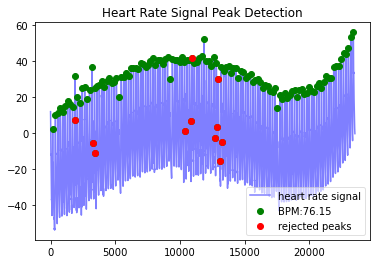

LowHigh
X004.txt

Finished in 0.006772 sec


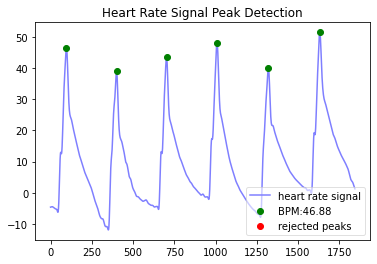

LowHigh
X005.txt

Finished in 0.010058 sec


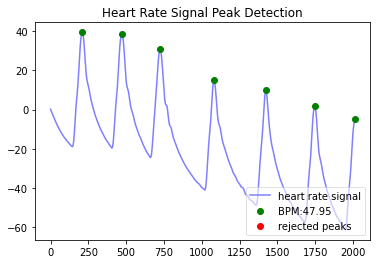

LowHigh
X006.txt

Finished in 0.044201 sec


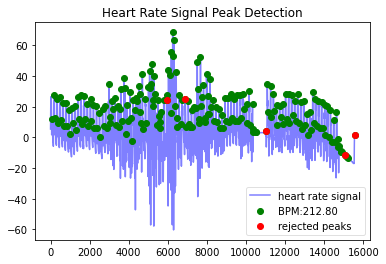

LowHigh
X007.txt

Finished in 0.019476 sec
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5240: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


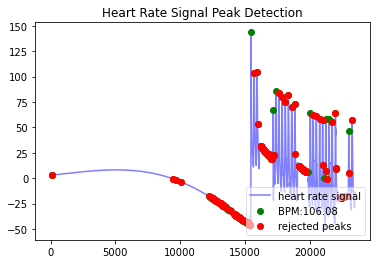

LowHigh
X008.txt

Finished in 0.009680 sec


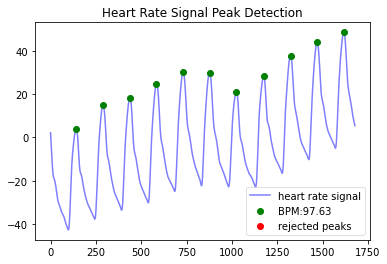

LowHigh
X009.txt

Finished in 0.005951 sec


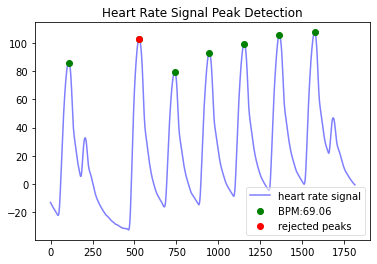

LowHigh
X010.txt

Finished in 0.026997 sec


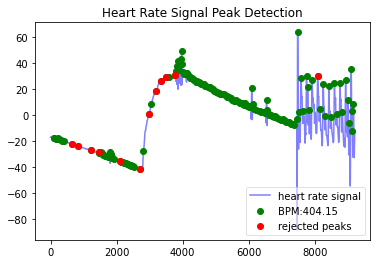

LowHigh
X011.txt

Finished in 0.017665 sec


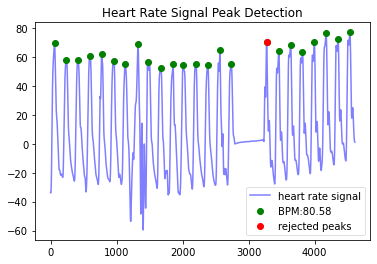

LowHigh
X012.txt

Finished in 0.030220 sec


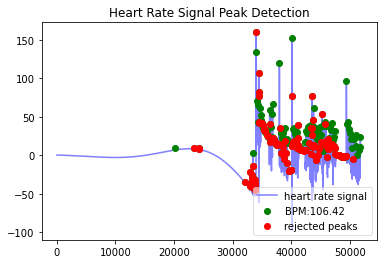

LowHigh
X013.txt

Finished in 0.035976 sec


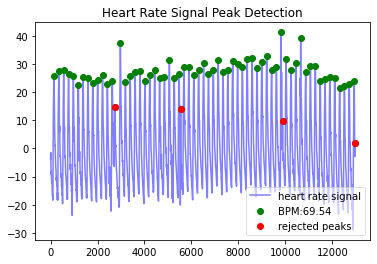

LowHigh
X014.txt
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5240: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)

Finished in 1.743871 sec


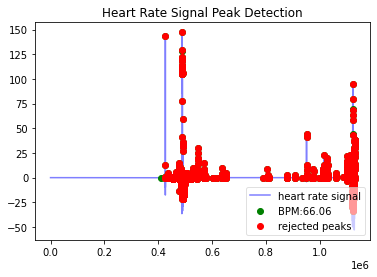

LowHigh
X015.txt

Finished in 0.009655 sec


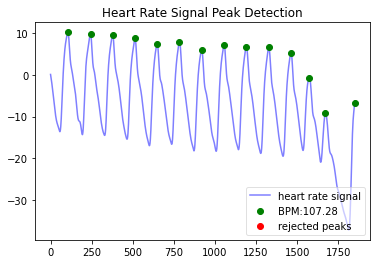

LowHigh
X016.txt

Finished in 0.012257 sec


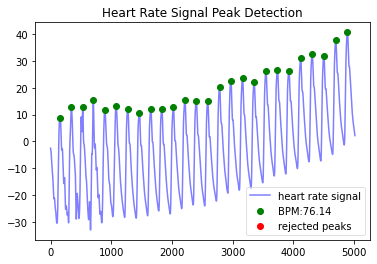

LowHigh
X017.txt

Finished in 0.014313 sec


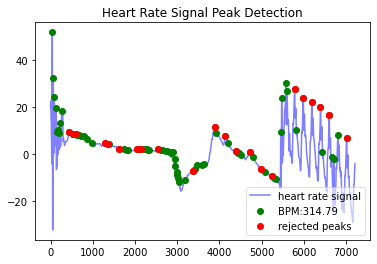

LowHigh
X018.txt

Finished in 0.105397 sec


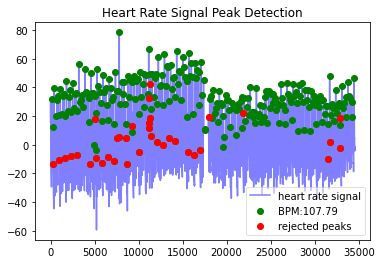

LowHigh
X019.txt

Finished in 0.051281 sec


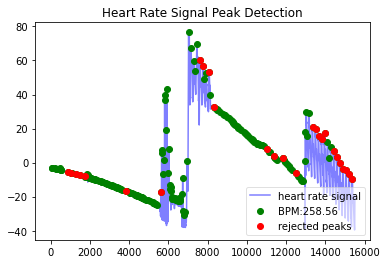

LowHigh
X020.txt

Finished in 0.045714 sec


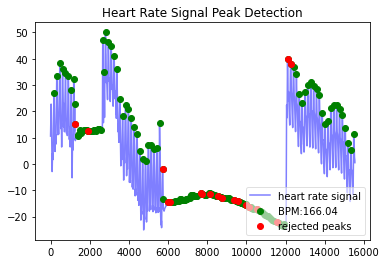

LowHigh
X021.txt

Finished in 0.015796 sec


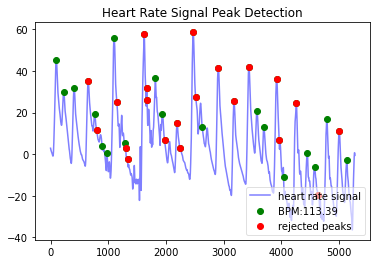

LowHigh
X022.txt

Finished in 0.048190 sec


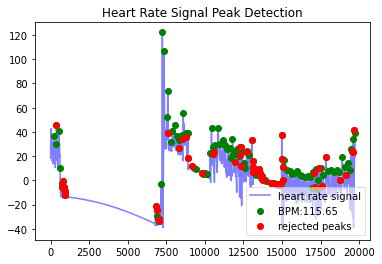

LowHigh


In [58]:
for d in range(22):
    d += 1
    if(d < 10):
        d = '0' + str(d)
    else:
        d = str(d)
    data = hp.get_data('Data/Raw Data/Multiple Cath/X0' + d + '.txt', delim = ' ', column_name = 'AO')
    # data = data[0:1500]
    print('X0' + d + '.txt')
    try:
        working_data, measures, plot, tag = preprocess(data, sample_rate)
    except:
        print('An error occurred')
        # X014 has an error due to hp.filter_signal returning bad values
    print(tag)

In [63]:
errors = """
            X007.txt
                Finished in 0.019476 sec
                /home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5240: RuntimeWarning: Mean of empty slice.
                dtype=dtype, **kwargs)[()]
                /home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
                **kwargs)
            X014.txt
                /home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5240: RuntimeWarning: Mean of empty slice.
                dtype=dtype, **kwargs)[()]
                /home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
                **kwargs)

        """

# Code for Testing

Low
LowHigh
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5240: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)

Finished in 1.482855 sec


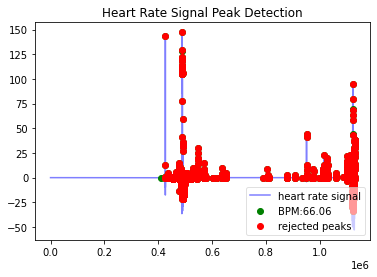

In [59]:
data1 = hp.get_data('Data/Raw Data/Multiple Cath/X014.txt', delim = ' ', column_name = 'AO')
data1 = [0 if i <= 0 else (550 if i > 550 else i) for i in data1]
tag = ""
try:
    data1 = hp.filter_signal(data1, cutoff=15, sample_rate=240.0, order=4, filtertype='lowpass')
    tag += "Low"
except ZeroDivisionError as e:
    print("Can't Divide by Zero -", e)
try:
    data1 = hp.filter_signal(data1, cutoff=.01, sample_rate=240.0, order=4, filtertype='highpass')
    print(tag)
    tag += "High"
    print(tag)
except ZeroDivisionError as e:
    print("Can't Divide by Zero -", e)
working_data, measures = hp.process(data1, 240.0, report_time=True, bpmmin=0, bpmmax=550)
plot = hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')
# working_data, measures, plot, tag

In [60]:
data = hp.get_data('Data/Raw Data/Multiple Cath/X007.txt', delim = ' ', column_name = 'AO')
data = [0 if i <= 0 else (550 if i > 550 else i) for i in data]
df = pd.DataFrame(data)
# df.to_csv('data.csv')